# I love LSD

## Create a structured pattern in noise

In [1]:
nb_syn, noise_density, simtime, t_true = 50, 1e-4, 2e3, 1e3
T=150

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def norm(X):
    return (X-X.min())/(X.max()-X.min())

def vonmises(N_inputs, A, theta, k=2):
    return A*norm(np.exp(k*np.cos(2*np.pi*(np.linspace(0, 1, N_inputs)-theta))))

def cospattern(N_inputs, A, theta, k = 4):
    return A*norm(np.cos(np.linspace(0,k*np.pi,N_inputs)+theta))

def linear(N_inputs, A, theta):
    return np.linspace(0, A, N_inputs)

def make_input(nb_syn, noise_density, simtime, T, t_true, theta = 0, function=cospattern, seed=None):
    np.random.seed(seed)
    # draw random gaussian noise spike timings -> shape (nb_syn, nb_ev_noise)
    N_noise = int(noise_density*simtime*nb_syn)
    adress_noise = np.random.randint(0, nb_syn, N_noise)
    time_noise = np.random.randint(0, simtime, N_noise)

    # draw stimulus -> stim
    adress_pattern = np.arange(0, nb_syn)
    time_pattern = (function(nb_syn, T, theta) + t_true).astype(int)

    # make address event representation
    time = np.hstack((time_noise, time_pattern))
    addr = np.hstack((adress_noise, adress_pattern))
    sorted_times = np.argsort(time)
    aer = (addr[sorted_times], time[sorted_times])

    return (adress_noise, time_noise), (adress_pattern, time_pattern), aer

def plot_input(aer_noise, aer_pattern):
    adress_noise, time_noise = aer_noise
    adress_pattern, time_pattern = aer_pattern
    fig, ax = plt.subplots(figsize = (13, 8))
    ax.scatter(time_pattern, adress_pattern, color='red');
    ax.scatter(time_noise, adress_noise, color='grey')
    return fig, ax

In [3]:
noise = (np.random.random((nb_syn, int(noise_density*simtime)))*simtime).astype(int)
noise

array([], shape=(50, 0), dtype=int64)

In [4]:
pattern = cospattern(nb_syn, T, theta=0).T
stim = (T + pattern).astype(int)
stim

array([300, 297, 290, 278, 263, 246, 227, 208, 190, 174, 162, 153, 150,
       151, 157, 167, 181, 198, 217, 236, 255, 271, 285, 294, 299, 299,
       294, 285, 271, 255, 236, 217, 198, 181, 167, 157, 151, 150, 153,
       162, 174, 190, 208, 227, 246, 263, 278, 290, 297, 300])

In [5]:

aer_noise, aer_pattern, aer = make_input(nb_syn, noise_density, simtime, T, t_true)

In [6]:
aer_noise

(array([27, 13, 11, 10, 39, 14, 25, 21, 44, 48]),
 array([1157,   19, 1204,  841,  114,  911,  308,  282,  363,  112]))

In [7]:
aer_pattern

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([1150, 1147, 1140, 1128, 1113, 1096, 1077, 1058, 1040, 1024, 1012,
        1003, 1000, 1001, 1007, 1017, 1031, 1048, 1067, 1086, 1105, 1121,
        1135, 1144, 1149, 1149, 1144, 1135, 1121, 1105, 1086, 1067, 1048,
        1031, 1017, 1007, 1001, 1000, 1003, 1012, 1024, 1040, 1058, 1077,
        1096, 1113, 1128, 1140, 1147, 1150]))

In [8]:
aer_pattern[1].min()

1000

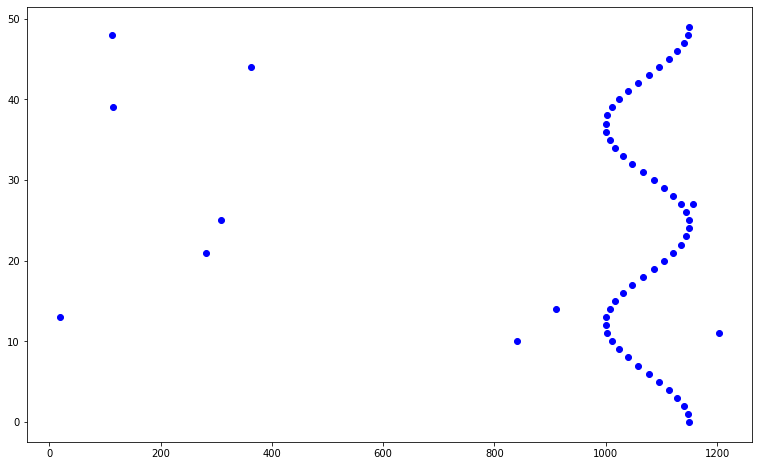

In [9]:
address, timestamp = aer
fig, ax = plt.subplots(figsize = (13, 8))
ax.scatter(timestamp, address, color='blue');

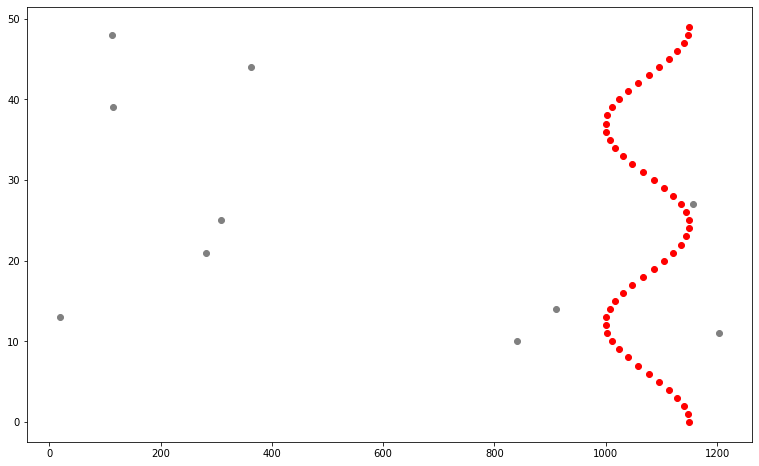

In [10]:
fig, ax = plot_input(aer_noise, aer_pattern)

In [11]:
t_true = aer_pattern[1].min()
t_true

1000

## Supervised STDP learning rule

In [12]:
address

array([13, 48, 39, 21, 25, 44, 10, 14, 12, 37, 36, 13, 11, 38, 14, 35, 10,
       39, 15, 34,  9, 40, 16, 33,  8, 41, 32, 17,  7, 42, 31, 18,  6, 43,
       30, 19, 44,  5, 29, 20, 45,  4, 28, 21, 46,  3, 27, 22, 47,  2, 26,
       23,  1, 48, 24, 25, 49,  0, 27, 11])

In [13]:
delays = np.random.randint(0, 100, nb_syn).astype(float)

In [14]:
delays[address]

array([10., 95., 19., 82., 75., 27., 53., 61.,  6., 85., 66., 10., 56.,
       28., 61., 21., 53., 19., 75., 60., 35., 79., 34., 60., 21., 23.,
       33., 42., 10., 85.,  2., 50., 68., 76., 67.,  9., 27., 82., 36.,
       63., 25., 36.,  7., 82., 15., 51., 63., 15., 47., 92., 41., 82.,
       59., 95., 13., 75., 16.,  8., 63., 56.])

In [15]:
timestamp

array([  19,  112,  114,  282,  308,  363,  841,  911, 1000, 1000, 1001,
       1001, 1003, 1003, 1007, 1007, 1012, 1012, 1017, 1017, 1024, 1024,
       1031, 1031, 1040, 1040, 1048, 1048, 1058, 1058, 1067, 1067, 1077,
       1077, 1086, 1086, 1096, 1096, 1105, 1105, 1113, 1113, 1121, 1121,
       1128, 1128, 1135, 1135, 1140, 1140, 1144, 1144, 1147, 1147, 1149,
       1149, 1150, 1150, 1157, 1204])

In [16]:
T = 100 # duration of a stimulus

class SD_neuron(object):
    """
    Synchrony detector neuron
    
    """
    def __init__(self, nb_syn, T=T,  tau=50, weight=.05):
        self.delays = np.random.rand(nb_syn) * T
        self.tau = tau # membrane time constant
        self.weight = weight # integration weight

    def code(self, aer):

        addresses, timestamps = aer

        delayed_timestamps = timestamps + self.delays[addresses]

        sorted_ind_times = np.argsort(delayed_timestamps)

        if False:
            V_old, t_old = 0., np.zeros((nb_syn,)) # initial membrane potential
            V = []
            times = []
            for i_time in sorted_ind_times:
                time = delayed_timestamps[i_time]
                dt =  time-t_old[addresses[i_time]] # time since last spike
                V_new = V_old + self.weight * np.exp(-dt/self.tau )
                V.append(V_new)
                times.append(time)
                V_old = V_new
                t_old[addresses[i_time]] = time
            V = np.array(V)
        else:
            V = self.weight * np.arange(len(addresses))
        
        return delayed_timestamps[sorted_ind_times], V


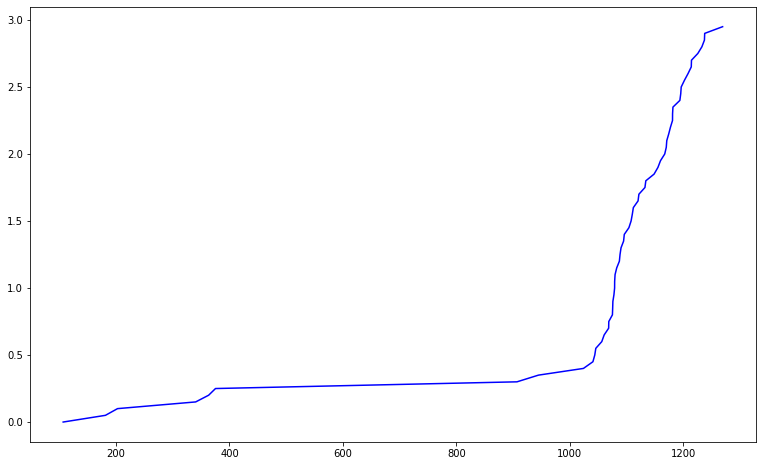

In [17]:
N = SD_neuron(nb_syn)

sorted_times, V = N.code(aer)
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(sorted_times, V, color='blue');

In [18]:
V

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95])

In [19]:
V>1.

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [20]:
np.argmax(V>1)

21

In [21]:
t_out = sorted_times[np.argmax(V>1)]
t_out

1079.2373048225354

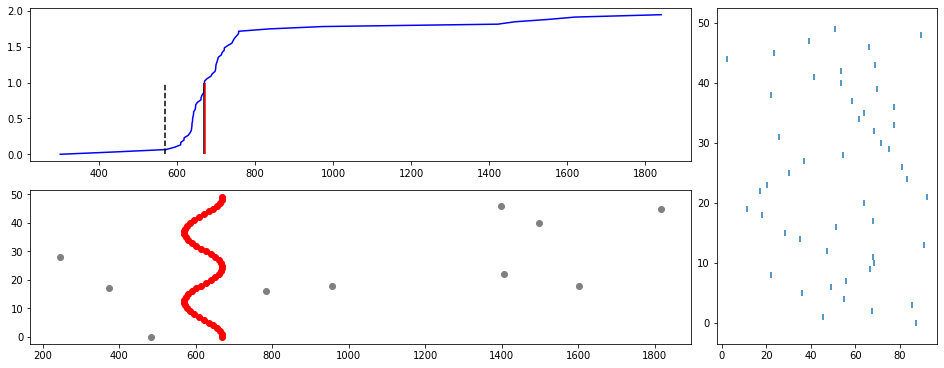

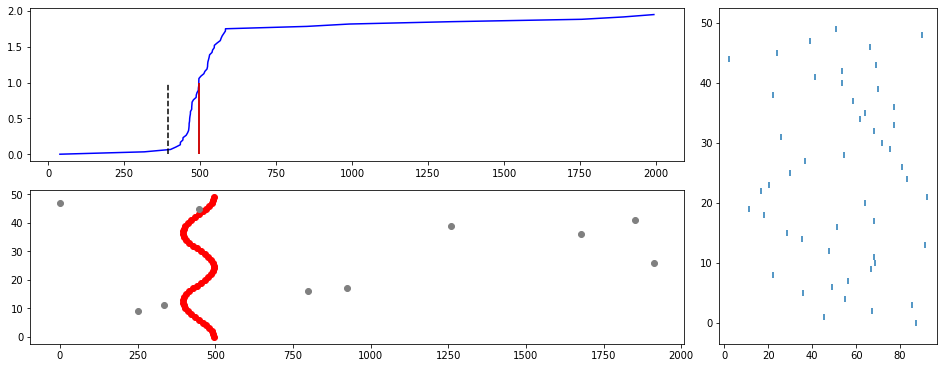

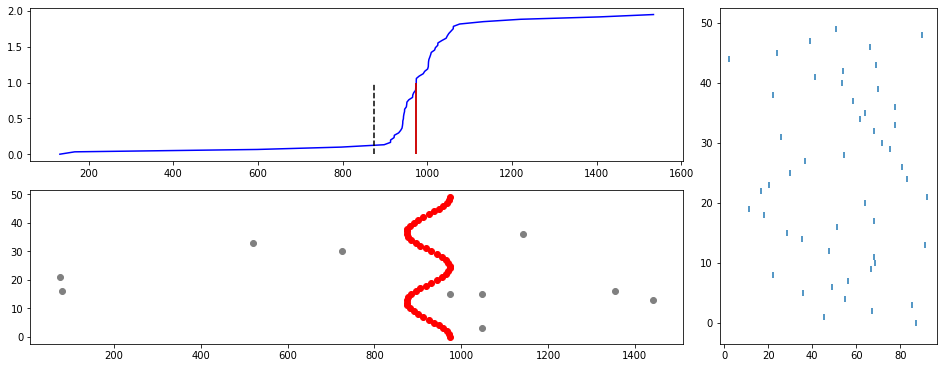

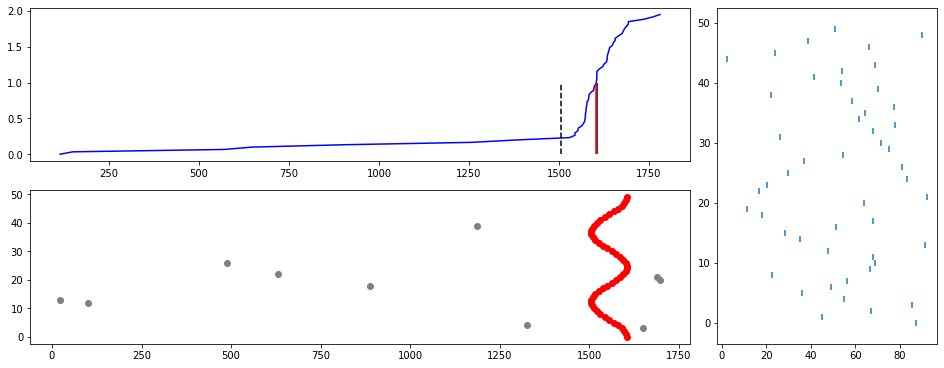

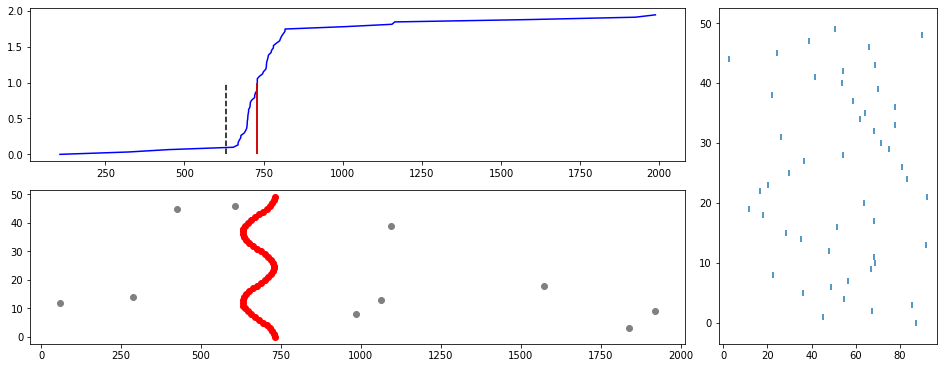

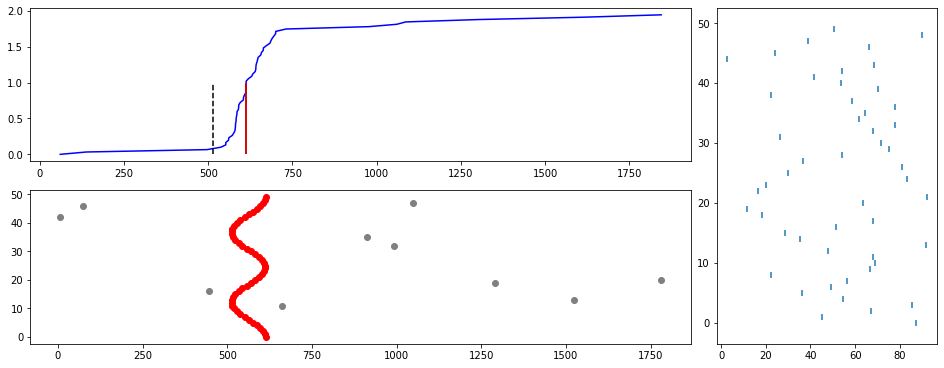

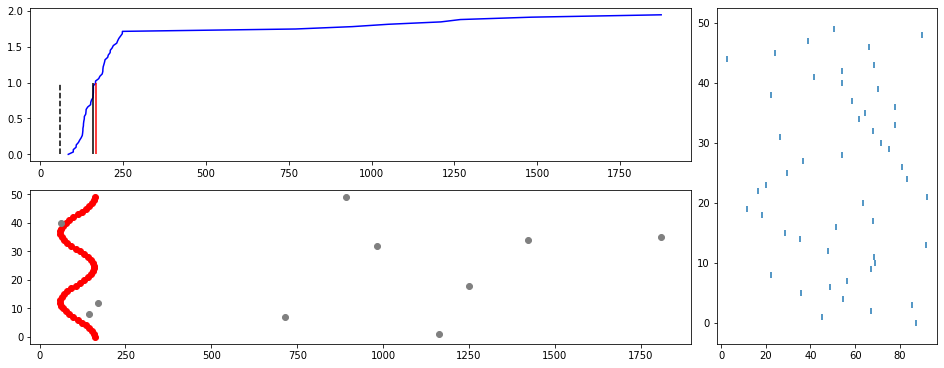

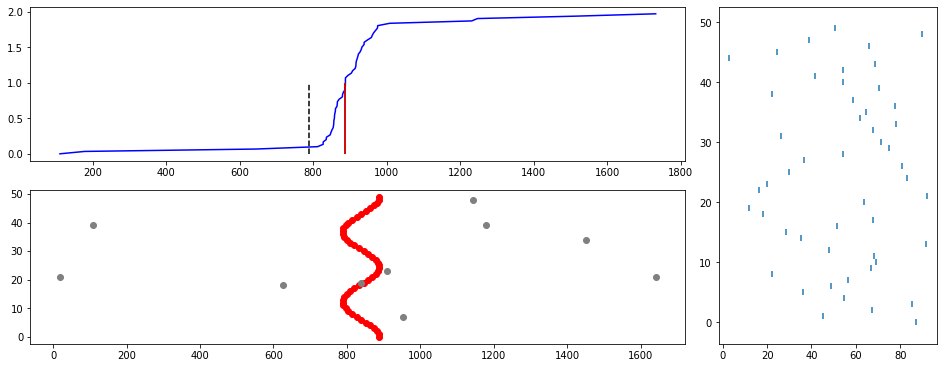

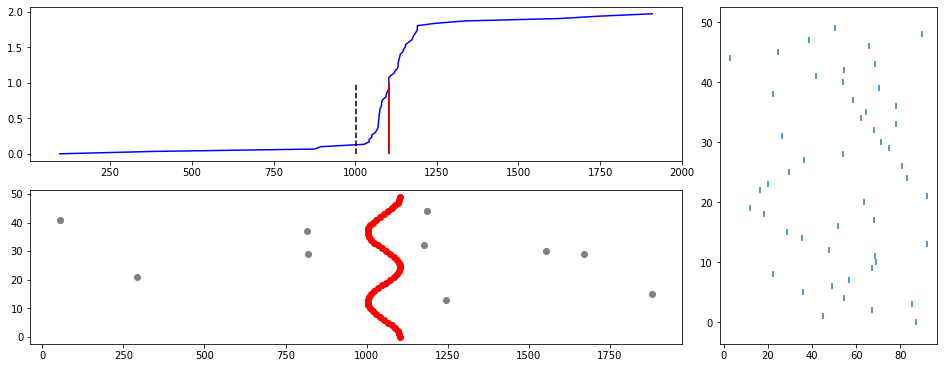

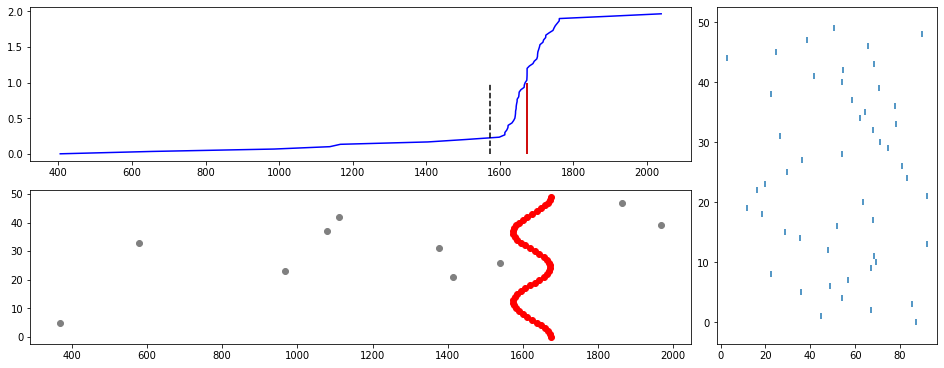

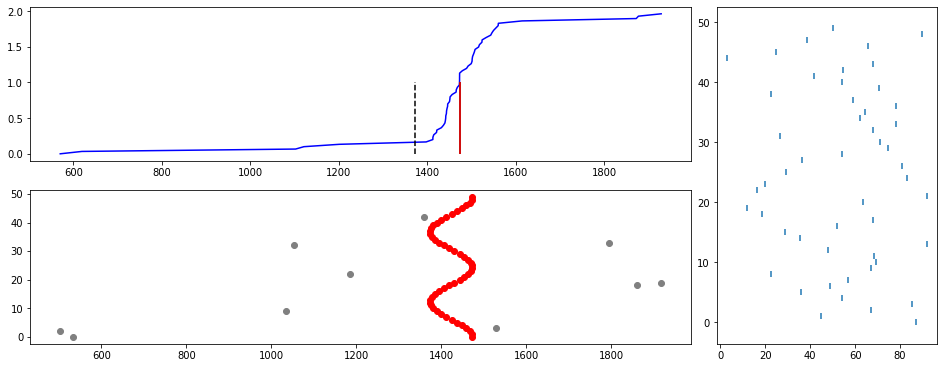

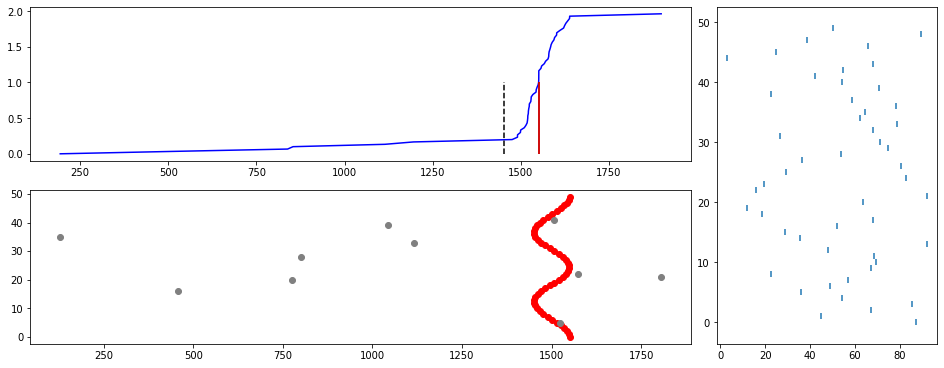

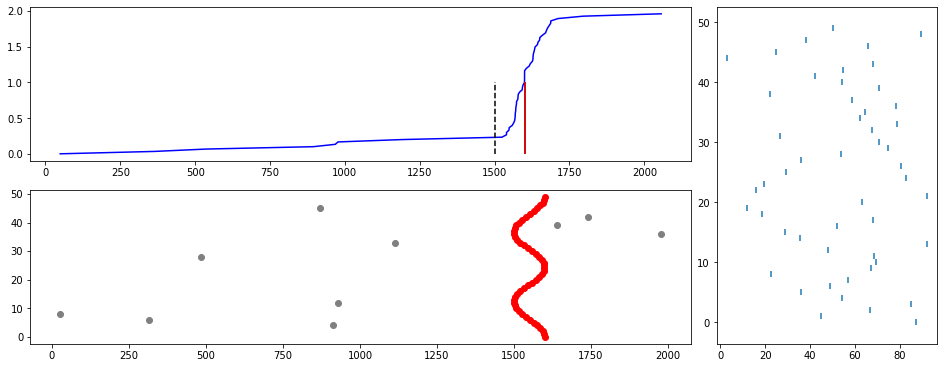

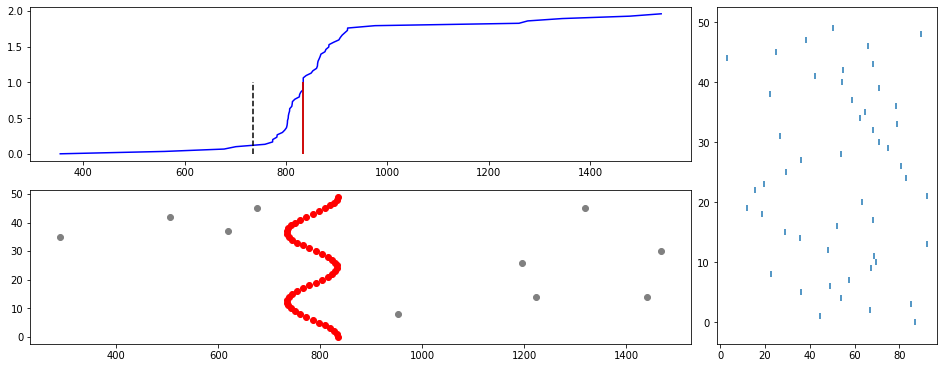

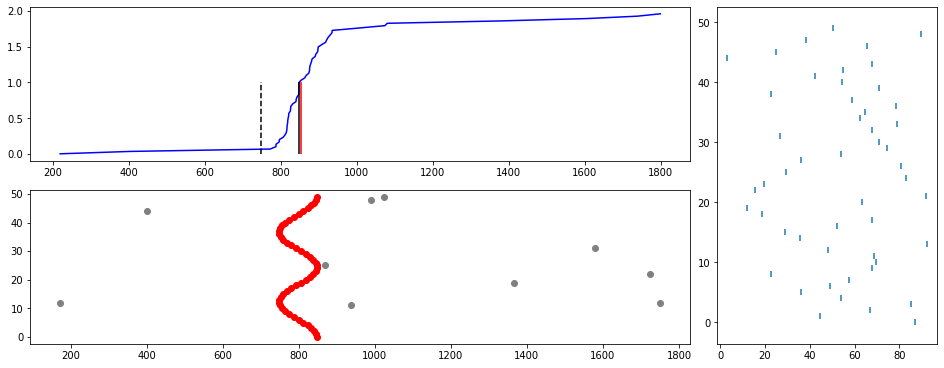

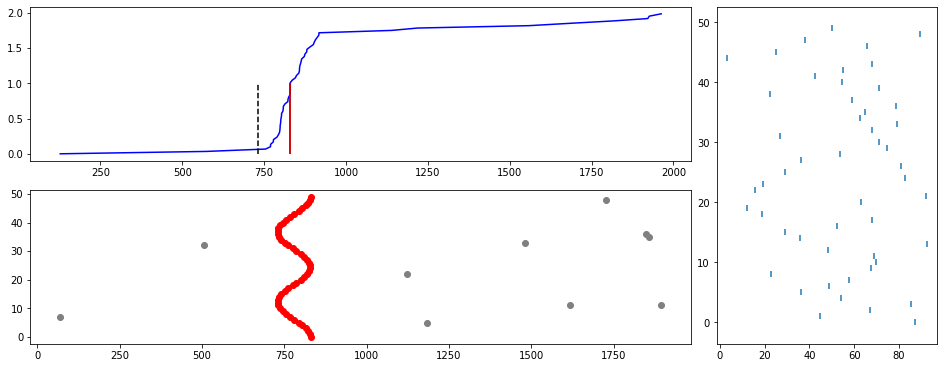

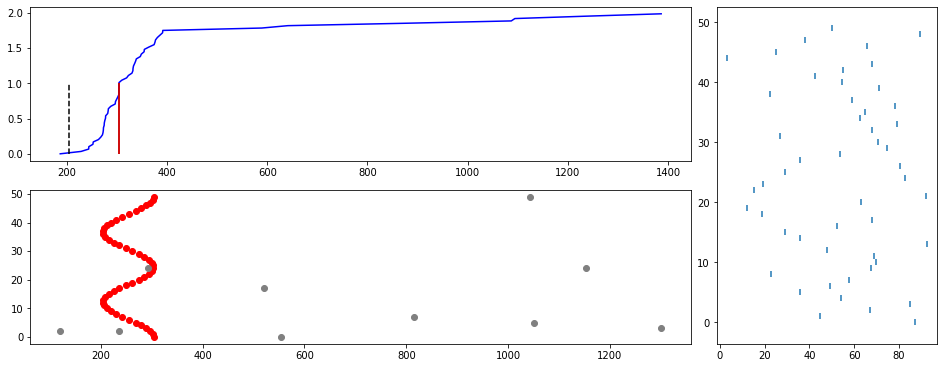

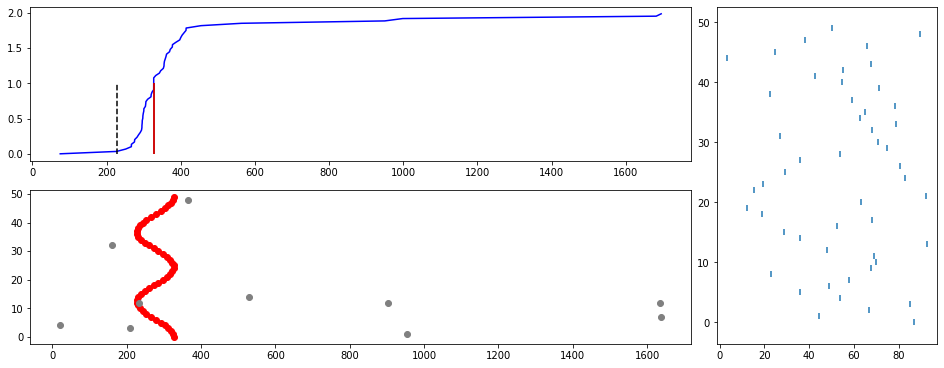

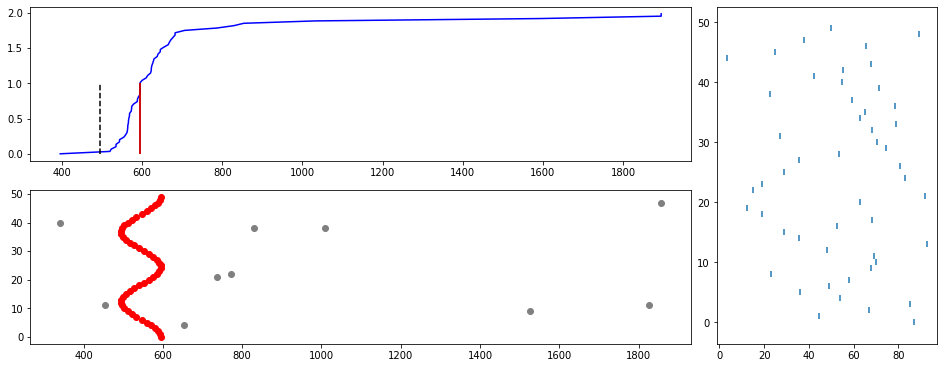

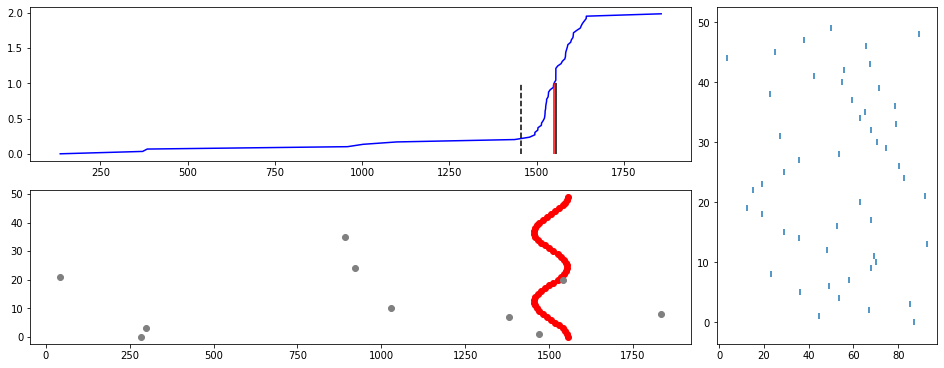

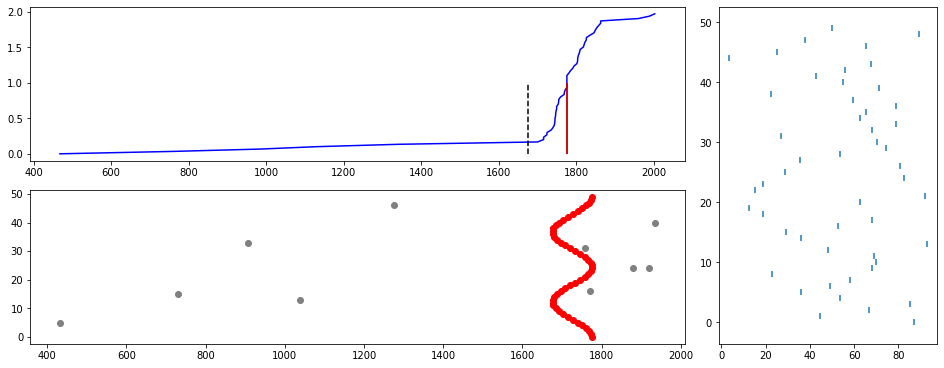

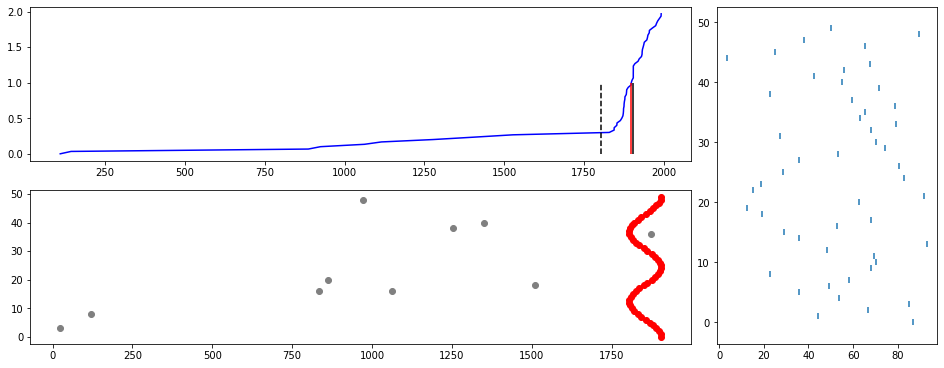

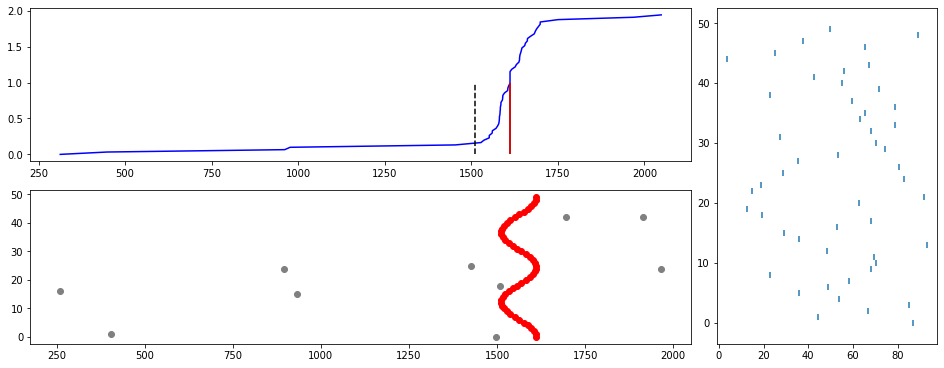

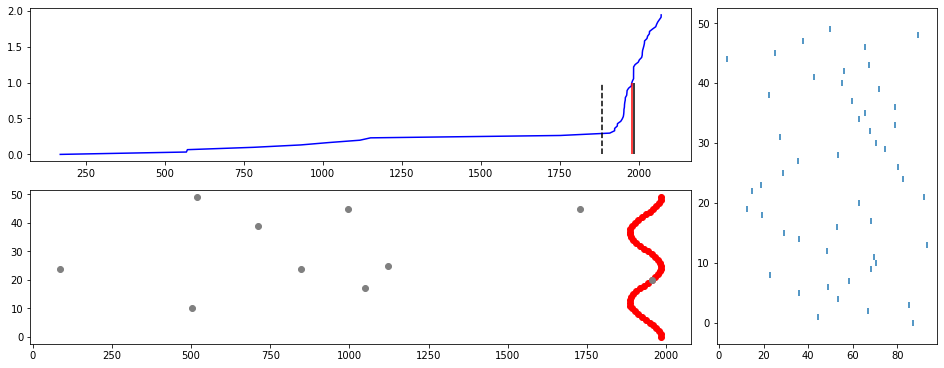

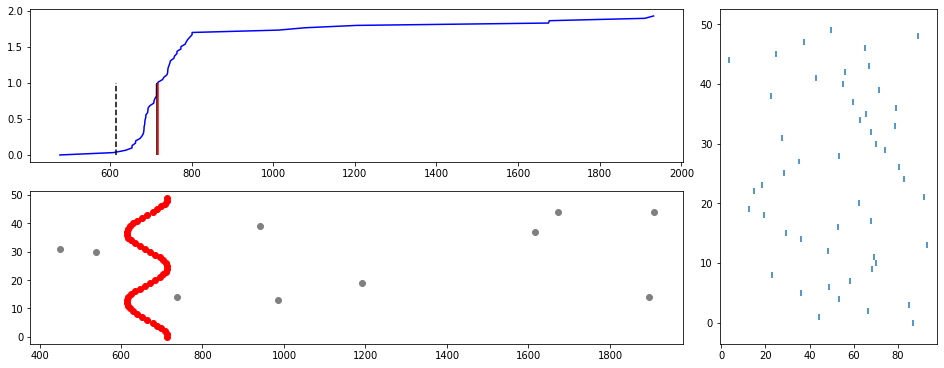

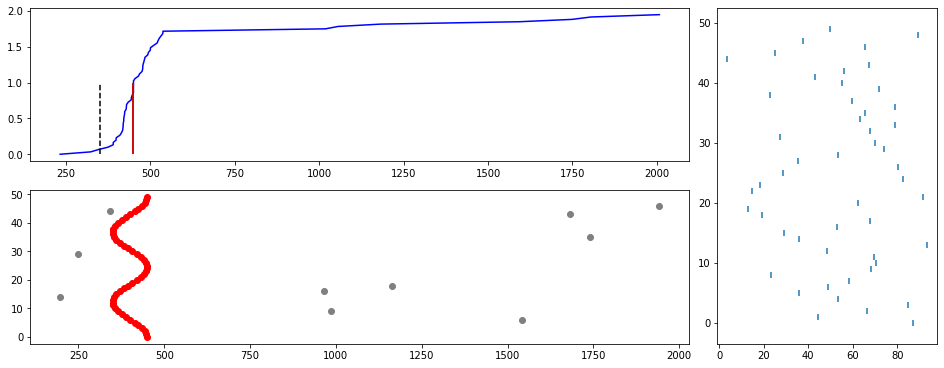

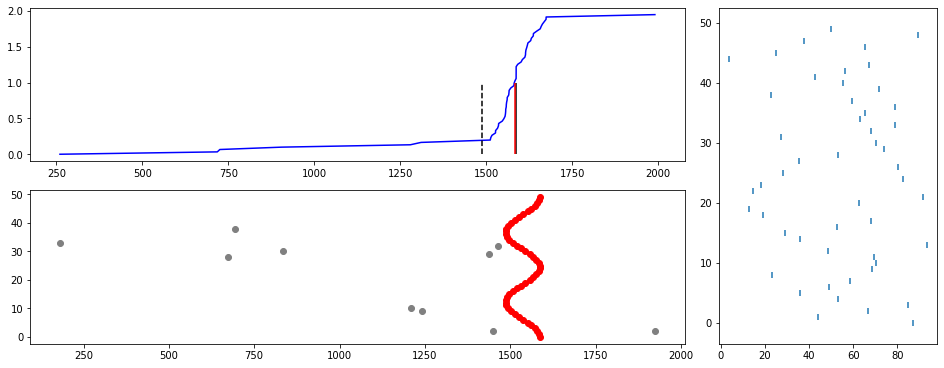

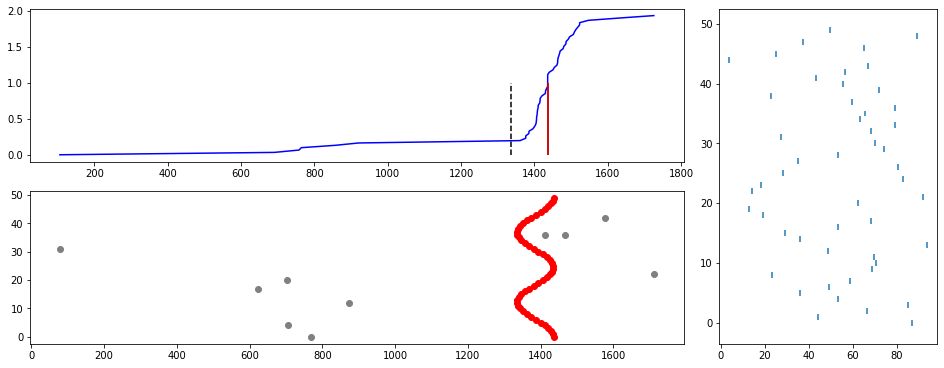

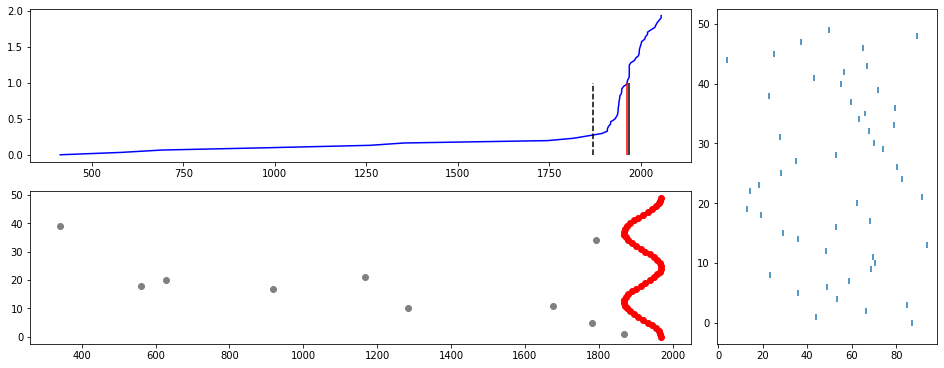

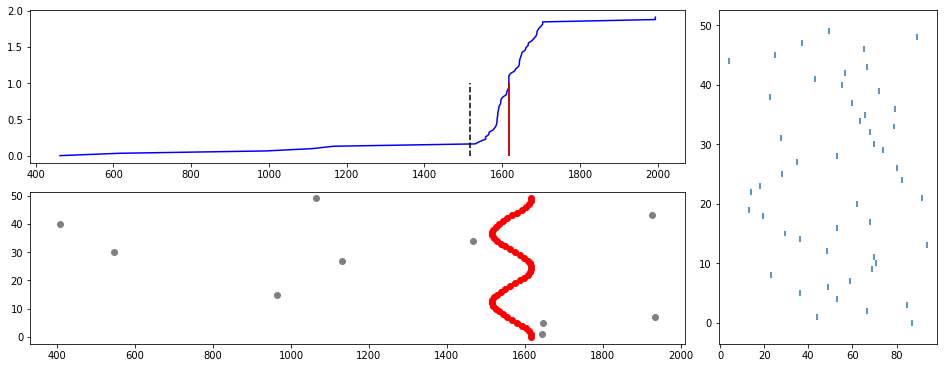

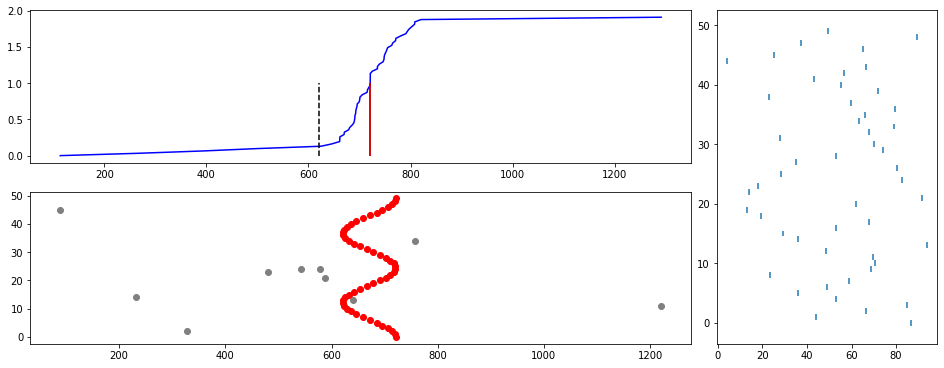

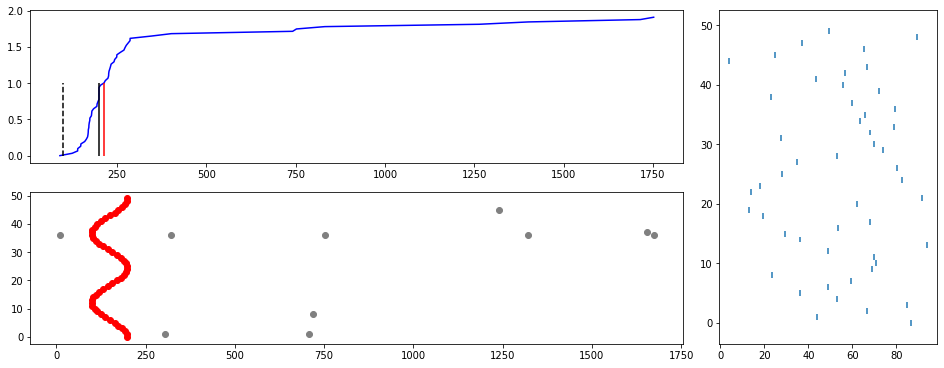

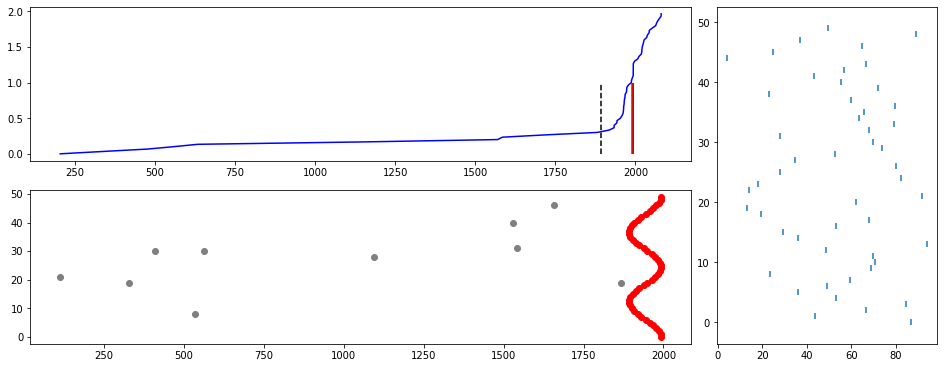

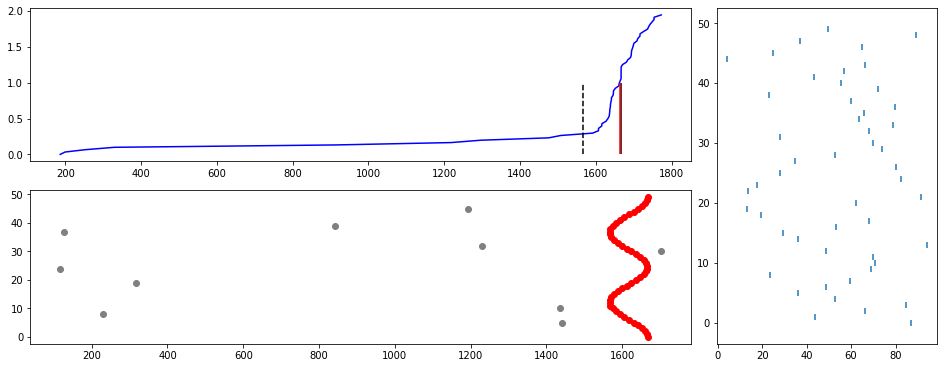

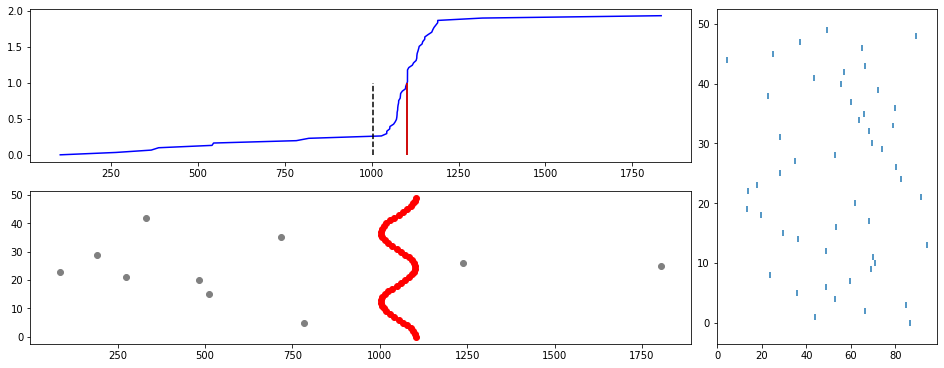

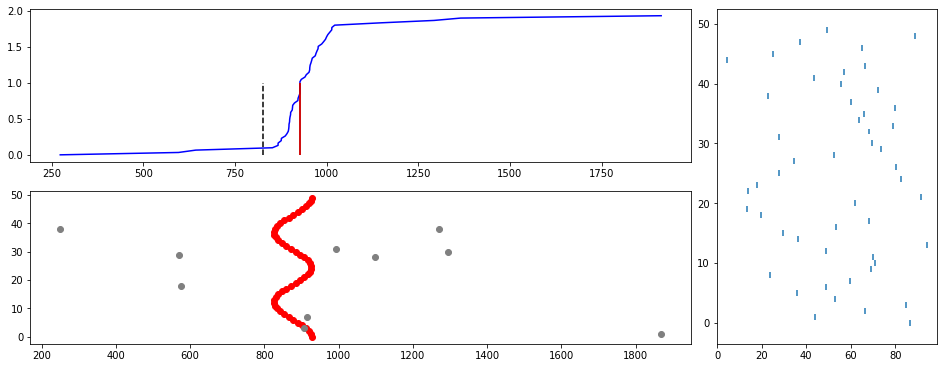

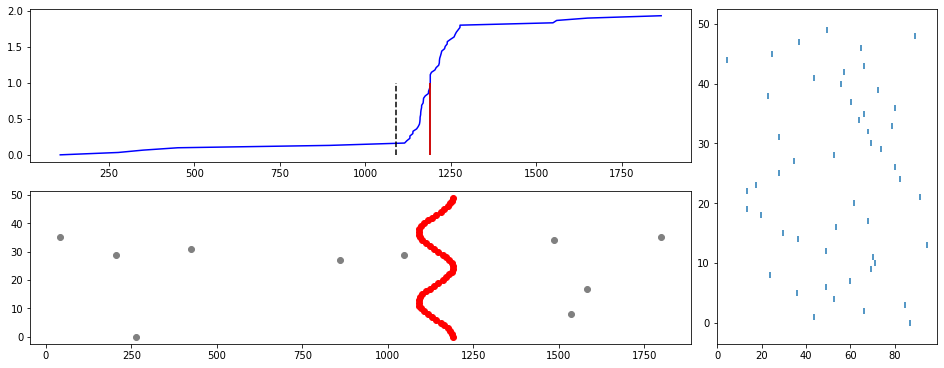

In [ ]:

Dweight0 = 1e-1
Ddelay0 = 1e-1
N_epochs = 100

for i_epoch in range(N_epochs):
    t_true = int(np.random.rand()*(simtime-T))
    aer_noise, aer_pattern, aer = make_input(nb_syn, noise_density, simtime, T, t_true)
    sorted_times, V = N.code(aer)

    # STDP rule on the weights
    if V.max() < 1: # does not spike : the weight is too low
        Dweight = Dweight0
    else:
        t_out = sorted_times[np.argmax(V>1)] # output spike
        time_error = (t_true+T) - t_out # negative= too early, positive = too late
        Dweight = Dweight0 * np.tanh( - time_error / N.tau )

        # STDP rule on the delays
        addresses, timestamps = aer
        for i_address, (address, timestamp) in enumerate(zip(addresses, timestamps)):
            # timestamp of the event at this address
            t_event = timestamp
            # predicted time by neuron:
            pred_time = t_true + T - N.delays[address]
            delay_pred_error = pred_time-t_event
            # STDP rule
            Ddelay = np.sign(delay_pred_error) * Ddelay0 * np.exp( - np.abs(delay_pred_error) / N.tau )
            N.delays[address] += Ddelay
            N.delays[address]= np.min((N.delays[address], T))
            N.delays[address]= np.max((N.delays[address], 0))

    N.weight *= 1 + Dweight
    #print(N.weight)
    
    if i_epoch % 10:
        fig = plt.figure(constrained_layout=True, figsize = (13, 5))
        axs = fig.subplot_mosaic(
        """
        AAAC
        BBBC
        """
        )
        axs['A'].plot(sorted_times, V, color='blue')
        axs['A'].vlines([t_true], 0, 1, linestyles='--', color='black')
        axs['A'].vlines([t_true+T], 0, 1, color='black')
        if V.max() > 1: axs['A'].vlines([t_out], 0, 1, color='red')
        adress_noise, time_noise = aer_noise
        adress_pattern, time_pattern = aer_pattern
        axs['B'].scatter(time_pattern, adress_pattern, color='red');
        axs['B'].scatter(time_noise, adress_noise, color='grey')

        axs['C'].eventplot(N.delays[:,np.newaxis]);
        plt.show()

In [23]:
for toto in enumerate(zip(addresses, timestamps)): print(toto)

(0, (9, 293))
(1, (46, 326))
(2, (37, 698))
(3, (36, 698))
(4, (13, 698))
(5, (12, 698))
(6, (38, 700))
(7, (11, 700))
(8, (14, 702))
(9, (35, 702))
(10, (10, 706))
(11, (39, 706))
(12, (34, 709))
(13, (15, 709))
(14, (9, 714))
(15, (40, 714))
(16, (33, 719))
(17, (16, 719))
(18, (8, 724))
(19, (41, 724))
(20, (32, 730))
(21, (17, 730))
(22, (42, 736))
(23, (7, 736))
(24, (31, 743))
(25, (18, 743))
(26, (6, 749))
(27, (43, 749))
(28, (19, 755))
(29, (30, 755))
(30, (5, 762))
(31, (44, 762))
(32, (29, 768))
(33, (20, 768))
(34, (4, 773))
(35, (45, 773))
(36, (28, 779))
(37, (21, 779))
(38, (3, 783))
(39, (46, 783))
(40, (27, 788))
(41, (22, 788))
(42, (47, 791))
(43, (2, 791))
(44, (26, 794))
(45, (23, 794))
(46, (1, 796))
(47, (48, 796))
(48, (24, 797))
(49, (25, 797))
(50, (49, 798))
(51, (0, 798))
(52, (8, 858))
(53, (6, 967))
(54, (24, 1289))
(55, (15, 1480))
(56, (42, 1567))
(57, (14, 1710))
(58, (38, 1752))
(59, (46, 1989))


{'A': <AxesSubplot:label='A'>,
 'C': <AxesSubplot:label='C'>,
 'B': <AxesSubplot:label='B'>}

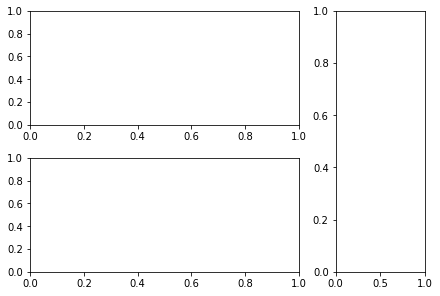

In [25]:
axd = plt.figure(constrained_layout=True).subplot_mosaic(
"""
AAAC
BBBC
"""
)
axd['A']